In [3]:
# import libraries
import numpy as np
from sklearn import datasets, tree, preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# check scikit-learn version
import sklearn
print('scikit-learn version is {}'.format(sklearn.__version__))

scikit-learn version is 1.0.2


In [9]:
# load data
iris = datasets.load_iris()

In [11]:
num_sample, num_feature = iris.data.shape
num_label = len(np.unique(iris.target))
print('we have %i samples in total'%num_sample)
print('we have %i features in total'%num_feature)
print('we have %i labels in total'%num_label)

we have 150 samples in total
we have 4 features in total
we have 3 labels in total


In [13]:
train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 12)

In [ ]:
# train decision tree

In [21]:
# use gini as criterion/loss function to train the tree
# define a function to plot decision boundary
# return fitted tree model
def decision_boundary(x, y, plot_step = 0.02, plot_colors = "ryb", n_classes = 3, method = 'gini'):
    # input x and y
    # default plot step = 0.02
    # default number of classes = 3
    # default color - red yellow blue
    # three labels, each label corresponds to a color
    # default method - gini (can also use entropy)
    plt.figure(figsize = (12, 10))
    for index, pair in enumerate([[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]):
        # train a tree for every 2 features
        X = x[:, pair]
        Y = y
        # train tree by criterion: gini or entropy
        clf = tree.DecisionTreeClassifier(criterion = method).fit(X,Y)

        # plot decision boundary
        plt.subplot(2, 3, index+1) # 2 rows, 3 columns
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)

        # predict the label of the meshgrid based on the tree model which has been trained before
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])

        # plot training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(Y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                       cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()
    return clf

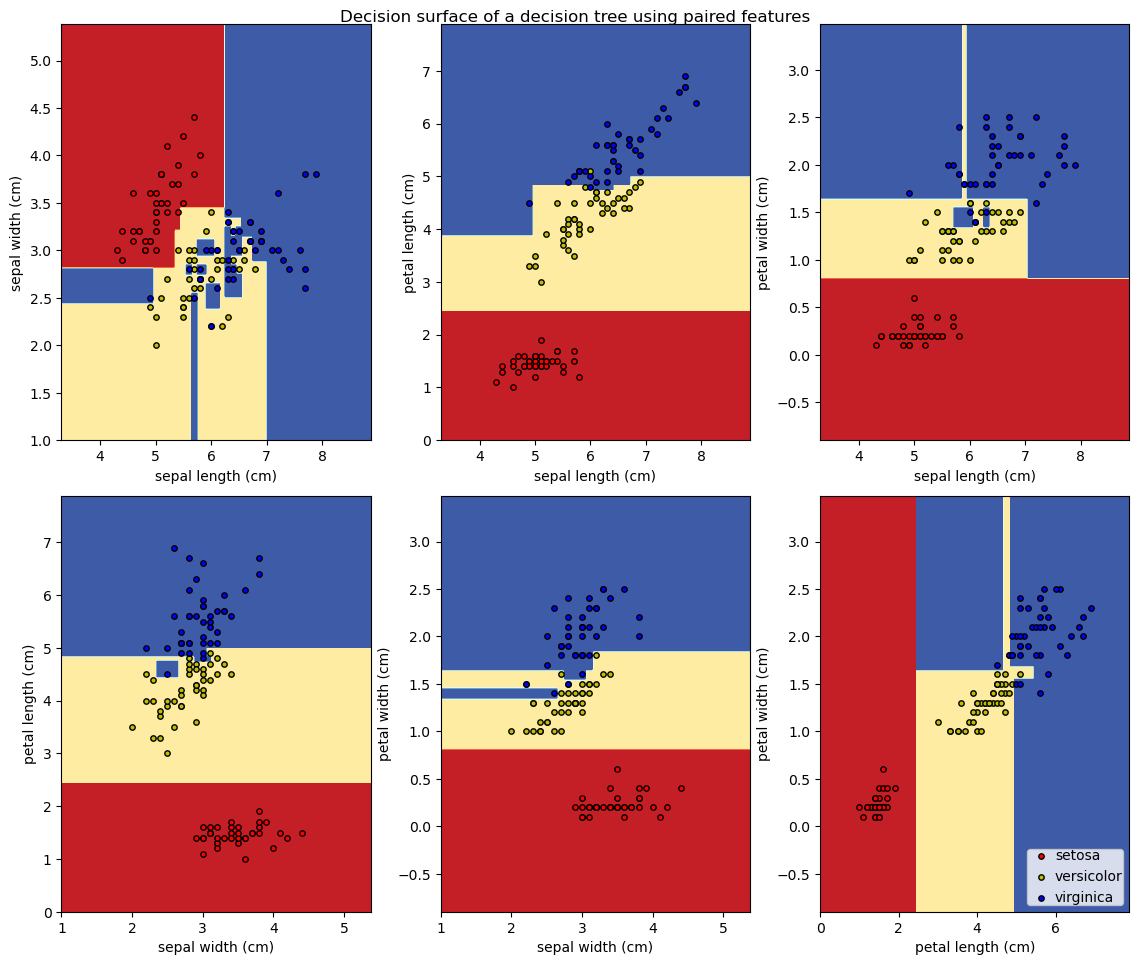

In [23]:
model = decision_boundary(train_x, train_y)

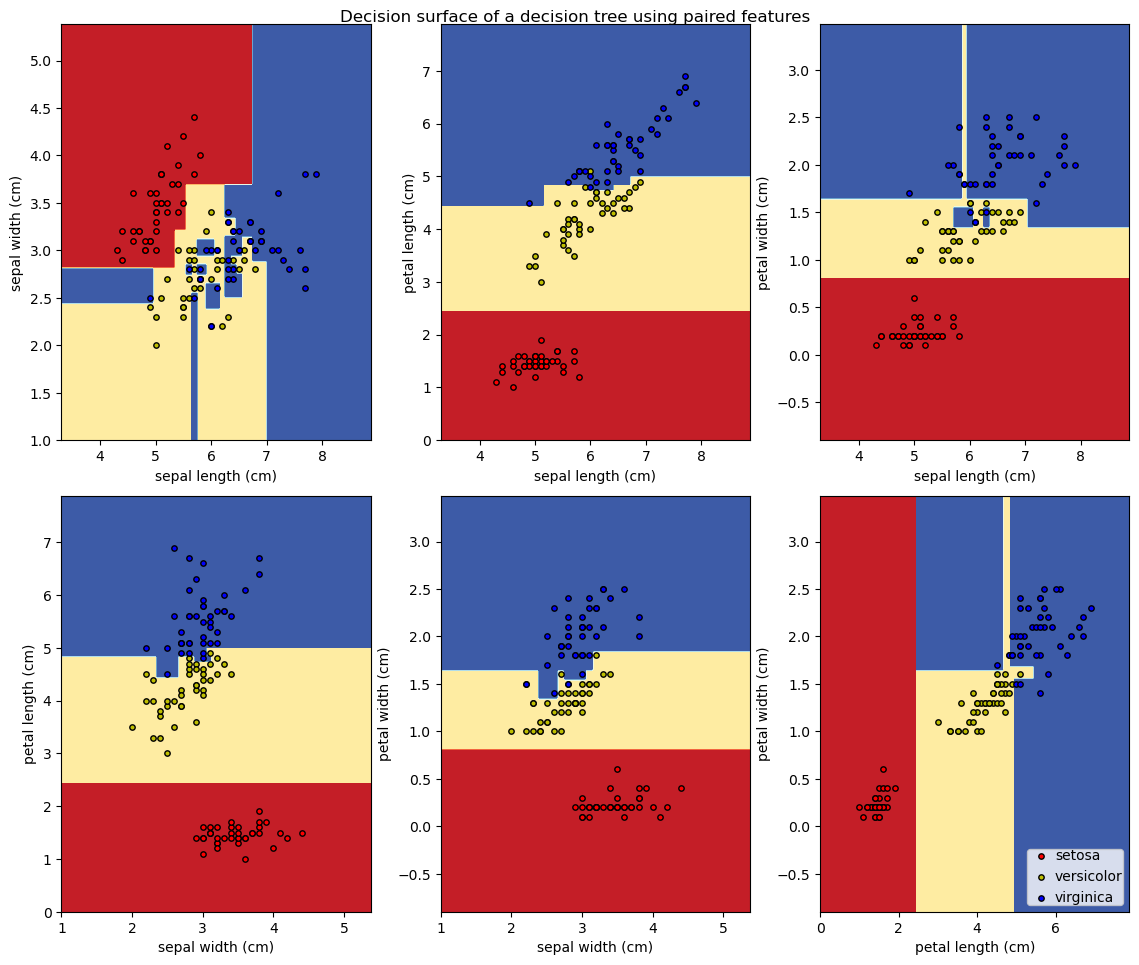

In [25]:
model = decision_boundary(train_x, train_y, method = 'entropy')

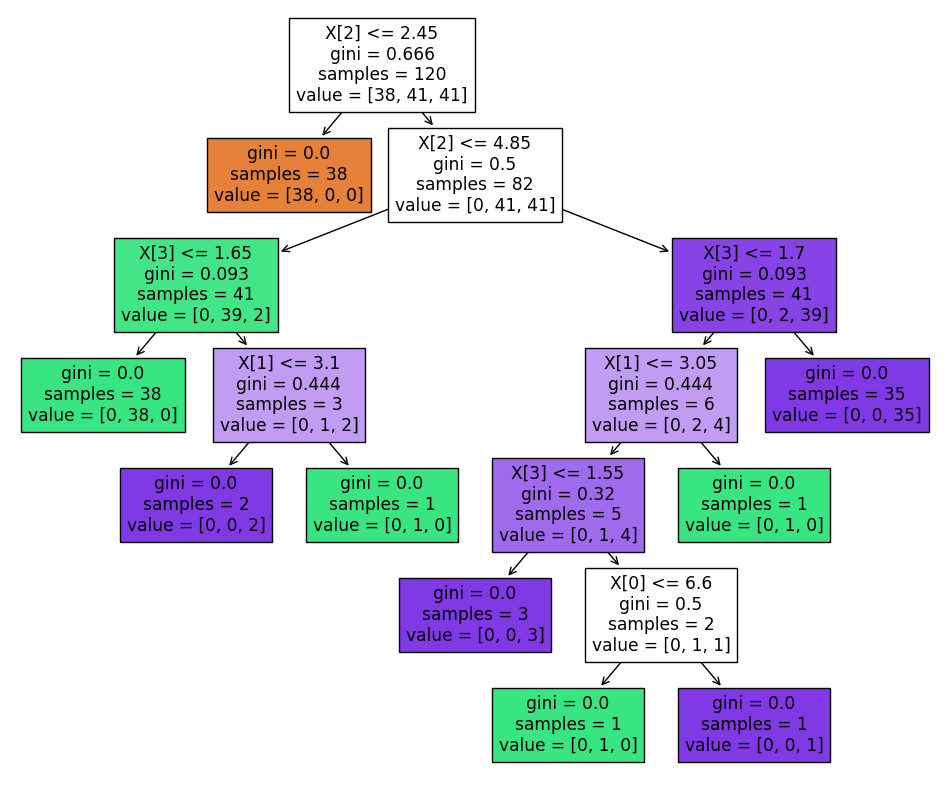

In [29]:
plt.figure(figsize = (12, 10))
clf = tree.DecisionTreeClassifier().fit(train_x, train_y)
tree.plot_tree(clf, filled=True)
plt.show()

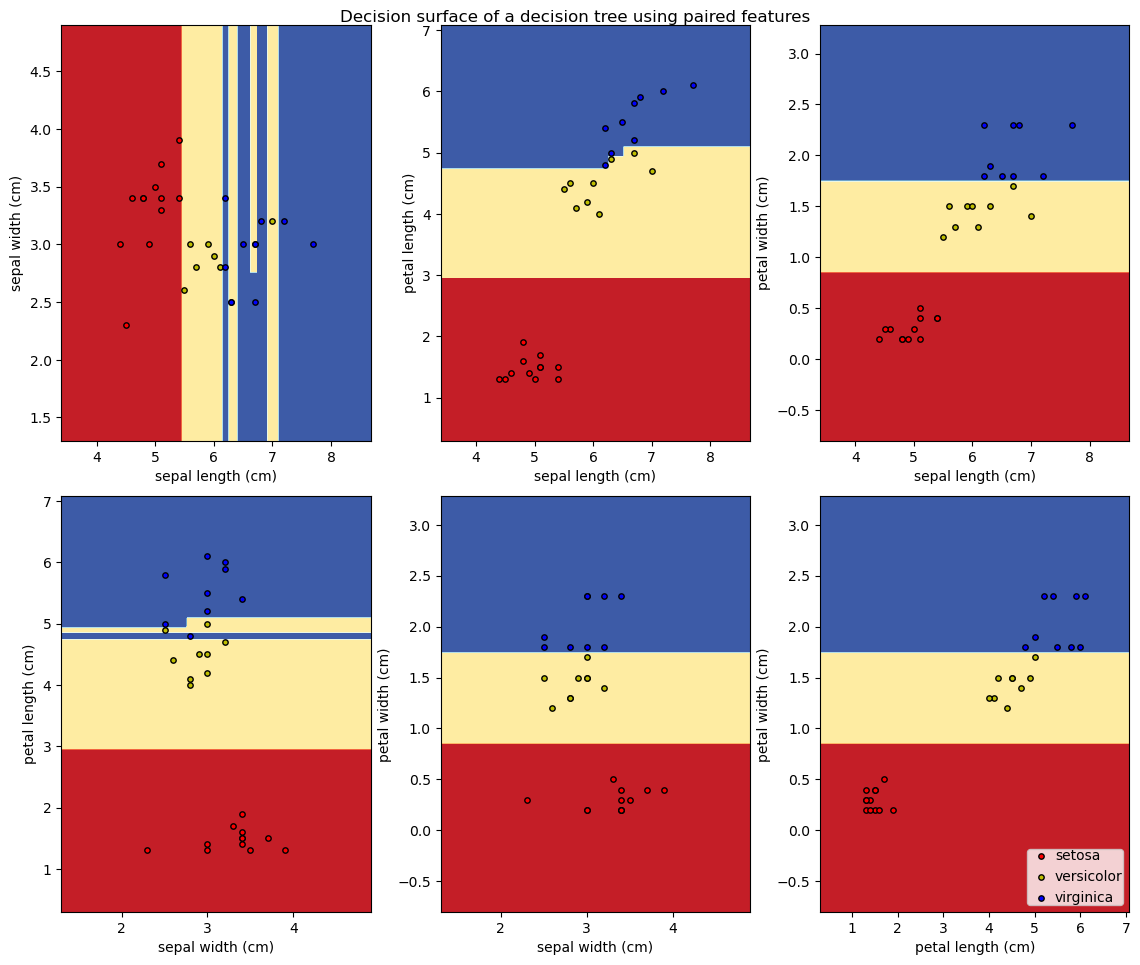

DecisionTreeClassifier()

In [31]:
decision_boundary(test_x, test_y)

In [35]:
# tree training
tree_model = tree.DecisionTreeClassifier().fit(train_x, train_y)
print('The proportion of the points that are correctly classified is %f'%metrics.accuracy_score(test_y, tree_model.predict(test_x)))

The proportion of the points that are correctly classified is 0.933333


In [37]:
print('The depth of the tree is %i'%tree_model.get_depth())

The depth of the tree is 6


In [39]:
correct_rate = dict()
for depth in range(1, 7):
    tree_model = tree.DecisionTreeClassifier(max_depth = depth).fit(train_x, train_y)
    print('Depth is %i'%depth)
    print('Correct rate is %f'%metrics.accuracy_score(test_y, tree_model.predict(test_x)))

Depth is 1
Correct rate is 0.700000
Depth is 2
Correct rate is 0.900000
Depth is 3
Correct rate is 0.933333
Depth is 4
Correct rate is 0.933333
Depth is 5
Correct rate is 0.933333
Depth is 6
Correct rate is 0.966667
